In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
conn = psycopg2.connect(
    host= '165.22.22.202',
    database = 'gsmarena',
    user= 'anomaly',
    password= 'Hitman.agent47'
  
)
cur = conn.cursor()
cur.execute("SELECT * FROM devices")
rows = cur.fetchall()
cur.close()
conn.close()

df_divices = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])

In [62]:
## 5
def convert_to_euro(value):
    if isinstance(value, str) and 'EUR' in value:
        return float(value.replace(' EUR', '')) 
    else:
        return float(value) * 0.9

df_divices['Price'] = df_divices['Price'].apply(convert_to_euro)
grouped_os = df_divices.groupby('OS')
sorted_os = grouped_os['Price'].mean().sort_values(ascending=False)
top_50_expensive = df_divices.nlargest(50, 'Price')
grouped_top_50_expensive = top_50_expensive.groupby('OS').size()
print(grouped_top_50_expensive)

OS
Android 10        27
Android 11         6
HarmonyOS 3.0      6
HarmonyOS 4.0      6
iPadOS 16.1        5
dtype: int64


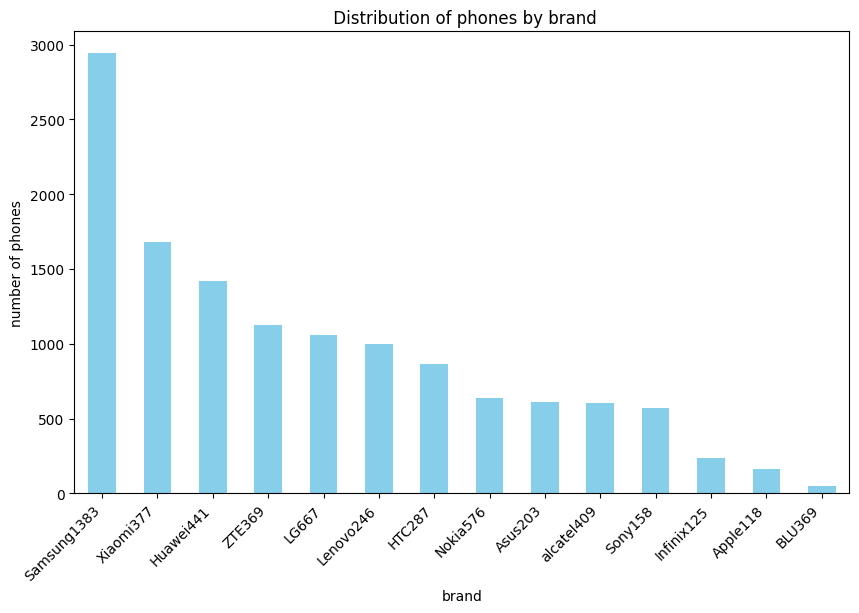

In [61]:
## 6

brand = df_divices['BrandName'].value_counts()
num_brands_to_display = 14
plt.figure(figsize=(10, 6))
brand.plot(kind='bar', color='skyblue')
plt.title(' Distribution of phones by brand')
plt.xlabel('brand')
plt.ylabel('number of phones')
plt.xticks(rotation=45, ha='right')
plt.show()

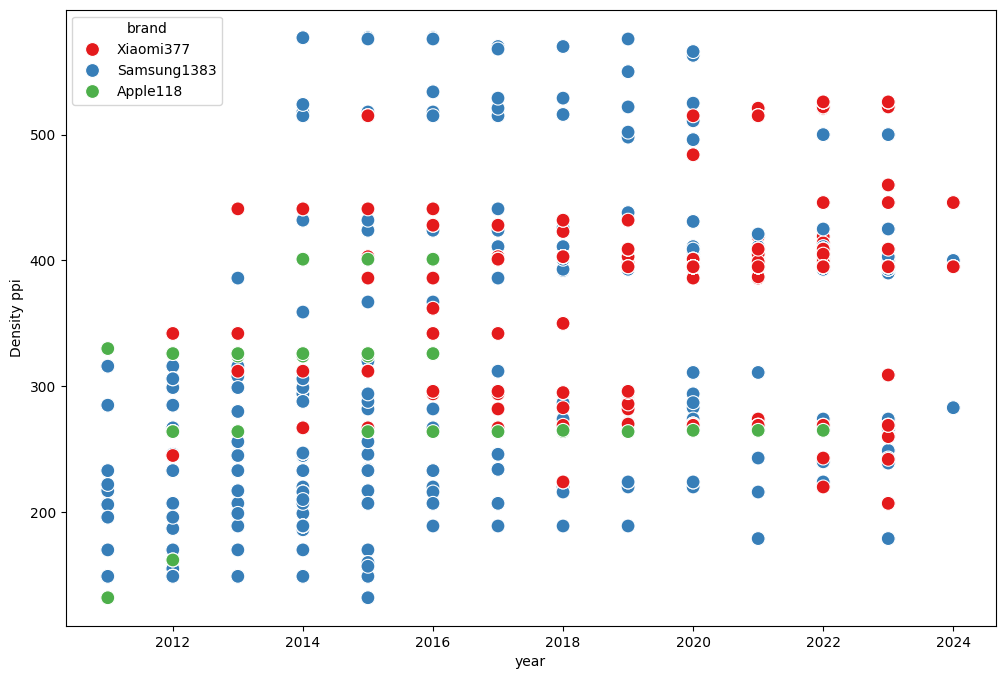

In [56]:
##7

selected_brands = ['Samsung1383', 'Apple118', 'Xiaomi377']
filtered_data = df_divices[df_divices['BrandName'].isin(selected_brands)]
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='LaunchDate',y='PPIDensity',  hue='BrandName', palette='Set1', s=100)
plt.xlabel('year')
plt.ylabel('Density ppi')
plt.legend(title='brand')
plt.show()

In [51]:
##8
df_divices['PPIDensity'] = pd.to_numeric(df_divices['PPIDensity'], errors='coerce').astype('int64')
# df_divices.info()

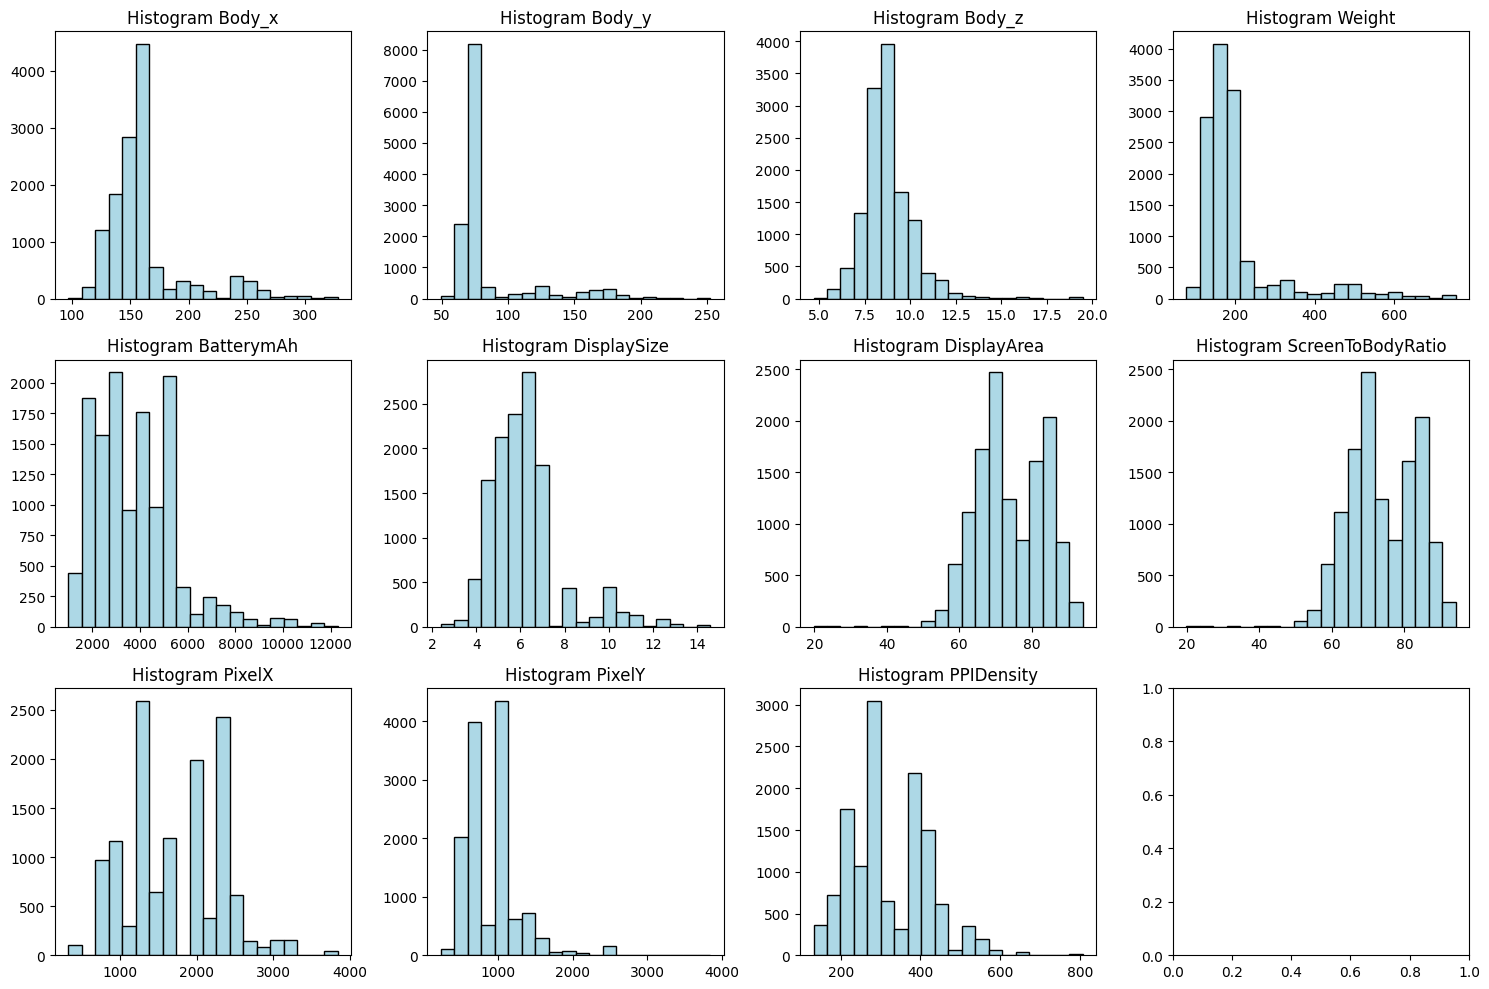

In [59]:
selected_columns = ['Body_x', 'Body_y', 'Body_z', 'Weight', 'BatterymAh', 'DisplaySize', 'DisplayArea', 'ScreenToBodyRatio', 'PixelX', 'PixelY', 'PPIDensity']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i in range(3):
    for j in range(4):
        if i * 4 + j < len(selected_columns):
            current_column = selected_columns[i * 4 + j]
            current_data = df_divices[current_column]
            axes[i, j].hist(current_data, bins=20, color='lightblue', edgecolor='black', alpha=1)
            axes[i, j].set_title(f'Histogram {current_column}')

plt.tight_layout()
plt.show()
